# MTH5001 Introduction to Computer Programming - Lecture 3
Module organisers Dr Lucas Lacasa and Prof. Thomas Prellberg

In [1]:
import math # mainly for factorial below
import numpy as np # import some standard modules, just in case we need them
import matplotlib.pyplot as plt

Today: more on sequences (indexing/slicing/list comprehension), plotting, and built-in functions

## More on sequences

### Reminder: indexing

In [2]:
fibonacci=[1,1,2,3,5,8,13,21,34,55,89,144,233]
print(fibonacci[0],fibonacci[1]) # indexing starts at ZERO !!!
print(fibonacci[4])
print(fibonacci[-1]) # last element of the list
print(fibonacci[len(fibonacci)-1])

1 1
5
233
233


### Slice

We can select sublists (slices) from a list by using two indices separated by a colon. The first index is the start index, and the second one is the first excluded index. The indices can also be omitted.

In [ ]:
print(fibonacci)
print(fibonacci[4:])
print(fibonacci[4:4+3])
print(fibonacci[:7])
print(fibonacci[:])

For example, the slice (sublist) `fibonacci[4:7]` consists of `fibonacci[4]`, `fibonacci[5]` and `fibonacci[6]`, but not `fibonacci[7]`, and the number of entries in this slice is equal to $7-4=3$.

Consistent with this, a slice with both indices being equal is an empty list.

In [ ]:
print(fibonacci[5:5])
print(len([]))
print(fibonacci[5:4])

As above, we can also use negative indices. For example, the slice `fibonacci[3:-2]` starts at  the entry with index $3$ and omits the final two entries.

In [ ]:
print(fibonacci[3:-2])
print(fibonacci[-10:7])

Slicing with `[-n,:]` gives the last $n$ entries.

In [ ]:
fibonacci[-4:]

Finally, by giving a third argument, we can skip over entries. To give out every second entry in the list, we can write the following.

In [ ]:
print(fibonacci)
print(fibonacci[0:8:2])
print(fibonacci[1:13:2])

Slicing works also with tuples:

In [ ]:
today=(2019,'February',21)
print(today)

In [ ]:
print(today[0])
print(today[0:1])
print(today[1:3])

In [ ]:
(2018+1,)

### Creating sequences made easier

So far, we have seen that we can create lists in Python by writing them out by hand, which is inefficient, or by using the range object, which is efficient but restricted to equally spaced integers. What if we wanted to generate a list of the first 71 square numbers? There is a nice construction in Python called [list comprehensions](http://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) allowing us to do just this:

In [ ]:
print([n**2 for n in range(1,72)])

We have just generated a list using the syntax "\[*expression* **for** *item* **in** *iterable*\]", where 

* *iterable* is a range, list, tuple, or any other kind of sequence object
* *item* is a variable name which sequentially takes each value in the iterable
* *expression* is a Python expression which is evaluated for each value of *item*

Lets compare the following three ways of generating a list of the first 20 integers. We can generate this list by hand, create the range object and convert it to a list, or use list comprehension.

In [ ]:
list1=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print(list1)
list2=list(range(1,21))
print(list2)
list3=[n for n in range(1,21)]
print(list3)

However, the list comprehension syntax is the most useful if we can explicitly express the $n$-th element of a list. Here are some more examples.

In [ ]:
print([n%3 for n in range(21)])
print([k**k for k in range(1,10)])
print([math.factorial(i) for i in range(3,20,2)])
print([1 for n in range(30)])

Remember that the *iterable* does not need to be a range object, but can be a list.

#### Local (dummy) variables

Note that in the above creation of lists, I have chosen different names for the variable. These variables are called *local* or sometimes *dummy*; they are only locally defined and are forgotten the moment the code has been run, and their name does not matter at all, it is just a place holder.

In [ ]:
[a for a in range(3)],[_2 for _2 in range(3)],\
[some_name_I_dont_care_about for some_name_I_dont_care_about in range(3)]

Neither `a`, `_2`, or `some_name_I_dont_care_about` are known after the previous code has been run

In [ ]:
# a

### Generators

In [4]:
print(type(3))

<class 'int'>


When writing code, you may already have noticed that sometimes we get as output `< ... >`. This happens because of how Python stores data internally. You may for example have gotten output such as `[<matplotlib.lines.Line2D at 0x124255d90>]` when plotting. Here are more examples, showing that ranges, tuples, and lists are treated differently.

In [5]:
[2*i for i in range(5)]

[0, 2, 4, 6, 8]

In [6]:
(2*i for i in range(5))

<generator object <genexpr> at 0x000001EE6717B1B0>

If you encounter this, you can get the result you presumably desired by converting the generator to a tuple by using `tuple()`

In [7]:
tuple((2*i for i in range(5)))

(0, 2, 4, 6, 8)

In [8]:
list((2*i for i in range(5)))

[0, 2, 4, 6, 8]

This is similar to using `list()` or `tuple()` on a range:

In [ ]:
range(5)

In [ ]:
list(range(5))

In [ ]:
tuple(range(5))

### Lists and Plotting

Now that we have discussed lists in Python, we shall briefly revisit plotting. 

In [9]:
import matplotlib.pyplot as plt
import numpy as np

Lets assume we want to plot a function defined only for integer values, such as Euler's totient function $\varphi(n)$, which counts the number of positive integers $m$ less than a given positive integer $n$ that are relatively prime to it, i.e. $gcd(n,m)=1$:

$$\varphi(n)=\left|\left\{m\in\mathbb N: m<n, gcd(n,m)=1\right\}\right|$$

A bit of googling shows that the the totient function is defined in the module `sympy`, so we simply load that function.

In [10]:
import sympy as sp

We can compute it for a few examples. For example, $12$ is coprime to $1,5,7,11$ (but not to $2,3,4,6,8,9,10$) so that $\varphi(12)$ should be $4$.

In [11]:
sp.totient(12)

4

We can use a list to give out $\varphi(n)$ for a range of values of $n$.

In [12]:
print([sp.totient(n) for n in range(1,101)])

[1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10, 4, 12, 6, 8, 8, 16, 6, 18, 8, 12, 10, 22, 8, 20, 12, 18, 12, 28, 8, 30, 16, 20, 16, 24, 12, 36, 18, 24, 16, 40, 12, 42, 20, 24, 22, 46, 16, 42, 20, 32, 24, 52, 18, 40, 24, 36, 28, 58, 16, 60, 30, 36, 32, 48, 20, 66, 32, 44, 24, 70, 24, 72, 36, 40, 36, 60, 24, 78, 32, 54, 40, 82, 24, 64, 42, 56, 40, 88, 24, 72, 44, 60, 46, 72, 32, 96, 42, 60, 40]


This doesn't seem to tell us much. To really appreciate this function, we should try plotting it. The plotting function accepts lists of $x$ and $y$ coordinates.

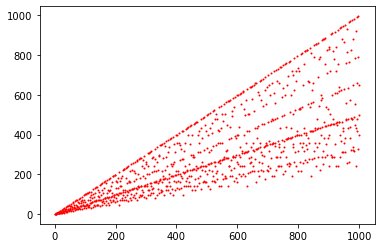

In [13]:
x=list(range(1,1001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=1)
plt.show()

Note that I have used some nice formatting shortcut here: 'ro' means red circles as markers and no lines. For details, and help on everything pyplot related, see https://matplotlib.org/tutorials/introductory/pyplot.html.

In [ ]:
x=list(range(1,100001))
y=[sp.totient(n) for n in x]
plt.plot(x,y,'ro',markersize=0.1)
plt.show()

This shows that the behaviour of $\varphi(n)$ seems to show some structure but is also intriguingly complicated. You can read up on this function [here](https://en.wikipedia.org/wiki/Euler's_totient_function).

### Points and Plotting

Lets assume we are given a sequence of points with $x$ and $y$ coordinates, say for a circle.

In [ ]:
circle_coordinates=[(np.cos(np.pi/180*phi),np.sin(np.pi/180*phi)) for phi in range(360)]

To practice slicing, lets look at angles that are multiples of 90 degrees.

In [ ]:
circle_coordinates[0:360:90]

How can we plot the points? Unfortunately we cannot simply plot tuples, we need to separate this into $x$ and $y$ coordinates.

In [ ]:
x_coord = [point[0] for point in circle_coordinates]
y_coord = [point[1] for point in circle_coordinates]

Now we are ready for plotting.

In [ ]:
plt.plot(x_coord,y_coord)
# the following line can be found searching Google for "matplotlib axes equal"
plt.gca().axis('equal')
plt.show()

Finally, lets turn this into a clock by adding hour and minute markers (using appropriate slicing)

In [ ]:
plt.plot(x_coord,y_coord,color='cyan')
plt.plot(x_coord[0:360:30],y_coord[0:360:30],'or',markersize=12)
plt.plot(x_coord[0:360:5],y_coord[0:360:5],'.k')
plt.gca().axis('equal')
plt.show()

And if you have fun with this sort of stuff, try adding more details...

In [ ]:
plt.plot(x_coord,y_coord,color='cyan')
plt.plot(x_coord[0:360:30],y_coord[0:360:30],'or',markersize=12)
plt.plot(x_coord[0:360:5],y_coord[0:360:5],'.k')
plt.gca().axis('equal')
# some more googling suggests the following code for some clock hands
plt.arrow(0,0,0.35,0.35,head_width=0.15, head_length=0.2, linewidth=3, fc='orange', ec='black')
plt.arrow(0,0,0,-0.65,head_width=0.1, head_length=0.25, linewidth=2, fc='lightblue', ec='black')
plt.plot([0],[0],'oy',markersize=20,markeredgecolor='black',markeredgewidth=1.5)
plt.show()

## Functions

We discussed sequence types and how to use these. We encountered situations where we repeated the same calculation for all entries of a sequence. Using the same calculation repeatedly for different input values is efficiently done with *functions*.

More importantly, as you will perhaps have noticed, all fancy things we have done so far such as graph plotting has bee done with the help of functions. We will first discuss existing built-in functions in more detail. Then we will describe a really important part of programming, which is writing your own functions. In fact, **you will write many functions** yourself, in exercises, tests, and the final project, so you really will have to come to terms with this.

### Built-in Functions for Sequences

Python has useful [built-in functions](http://docs.python.org/3/library/functions.html) for working with sequences. You have already seen in the tutorial that we can compute the length of a list, sum up all the entries in a list of numbers, or determine their minimum and maximum values.

In [ ]:
list0=[j for j in range(1,41,2)]
print(list0)
print('this list has', len(list0), 'entries')
print('the smallest value is', min(list0), 'and the largest value is', max(list0))
print('the sum of all the entries is', sum(list0))

We can also sort the entries in a list.

In [ ]:
list0=[j*(-1)**j for j in range(1,10,1)]
print(list0)
print(sorted(list0))

### Further Built-in Functions

We already encountered a selection of other built-in functions, such as `type()` and `print()`. The following is a list of frequently used [built-in functions](http://docs.python.org/3.3/library/functions.html) in these lectures.

| Function | Description|
|----------|------------|
|`print(object)`| print `object` to output |
|`type(object)`| return the type of `object` |
|`abs(x)`|	return the absolute value of `x` (or magnitude if `x` is complex)|
|`int(x)`|	return the integer constructed from float `x` by truncating decimal|
|`len(sequence)`|	return the length of the `sequence`|
|`sum(sequence)`|	return the sum of the entries of `sequence`|
|`max(sequence)`|	return the maximum value in `sequence`|
|`min(sequence)`|	return the minimum value in `sequence`|
|`range(a,b,step)`|	return the range object of integers from `a` to `b` (exclusive) by `step`|
|`list(sequence)`|	return a list constructed from `sequence`|
|`sorted(sequence)`|	return the sorted list from the items in `sequence`|
|`reversed(`sequence`)`|	return the reversed iterator object from the items in `sequence`|
|`enumerate(sequence)`|	return the enumerate object constructed from `sequence`|
|`zip(a,b)`|	return an iterator that aggregates items from sequences `a` and `b`|

Some of the functions we have not encountered yet. `abs()` computes the absolute value (or magnitude) of a number. Note that the absolute value of an integer is returned as an integer, but that the absolute values of floats and complex numbers are returned as floats.

In [ ]:
print(abs(-3))
print(abs(-3.0))
print(abs(3+4j))

We have learned that division of integers produces floats. What if we want to convert a float result back to integer? We can do this either with `int()`. Note that the function `int()` truncates towards zero.

In [ ]:
print(int(-1.414))
print(int(1.414))

We encountered several functions involving sequences, such as `range()`, `list()`, and `sorted()`. The function `reversed()` does what you would expect it to do, but note that `reversed()` does not return a list, so we need to use `list()` if we want the output to be a list. This is similar to having to convert a range object to a list.

In [ ]:
print(reversed([1,5,8,-10]))
print(list(reversed([1,5,8,-10])))
print(list(reversed(range(1,11))))

The function `zip()` combines sequences into a list of pairs.

In [ ]:
list_a=[3,55,1,2]
list_b=[4,5,2,-7]
print(zip(list_a,list_b))
print(list(zip(list_a,list_b)))

In [ ]:
print(list(zip(x_coord,y_coord))[:5])
print(circle_coordinates[:5])

Finally, the function `enumerate()` enumerates a sequence by zipping it with `range(len(sequence))`.

In [ ]:
print(list_a)
range_a=range(len(list_a))
print(list(zip(range_a,list_a)))
print(list(enumerate(list_a)))
print(enumerate(list_a))

## Conclusion and Outlook

In this lecture we have discussed sequences and built-in functions. Next week we will discuss user-defined functions.